In [1]:
#!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [7]:
!pip install gdown
#!pip install tensorflow-gpu

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
     |################################| 68 kB 30 kB/s eta 0:00:011
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9681 sha256=10dbf62687d539b032861386b8b5a706470c9137d24089c66e371ab3fee04e0a
  Stored in directory: /home/captain/.cache/pip/wheels/33/15/6e/df5f8336275e96e19599034a76f9cfd81c6ae15d2bf16c11ca
Successfully built gdown


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [9]:
!gdown --id 152sWECukjvLerrVG2NUO8gtMFg83RKCF --output WISDM_ar_latest.tar.gz
!tar -xvf WISDM_ar_latest.tar.gz

Downloading...
From: https://drive.google.com/uc?id=152sWECukjvLerrVG2NUO8gtMFg83RKCF
To: /home/captain/Desktop/harsha_project/WISDM_ar_latest.tar.gz
11.4MB [00:08, 1.29MB/s]
WISDM_ar_v1.1/
WISDM_ar_v1.1/readme.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_raw_about.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_transformed.arff
WISDM_ar_v1.1/WISDM_ar_v1.1_trans_about.txt


In [10]:
column_names = ['user_id', 'activity', 'timestamp', 'x_axis', 'y_axis', 'z_axis']

df = pd.read_csv('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', header=None, names=column_names)
df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
df['z_axis'] = df.z_axis.astype(np.float64)
df.dropna(axis=0, how='any', inplace=True)

In [11]:
df.head()

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [12]:
df.shape

(1098203, 6)

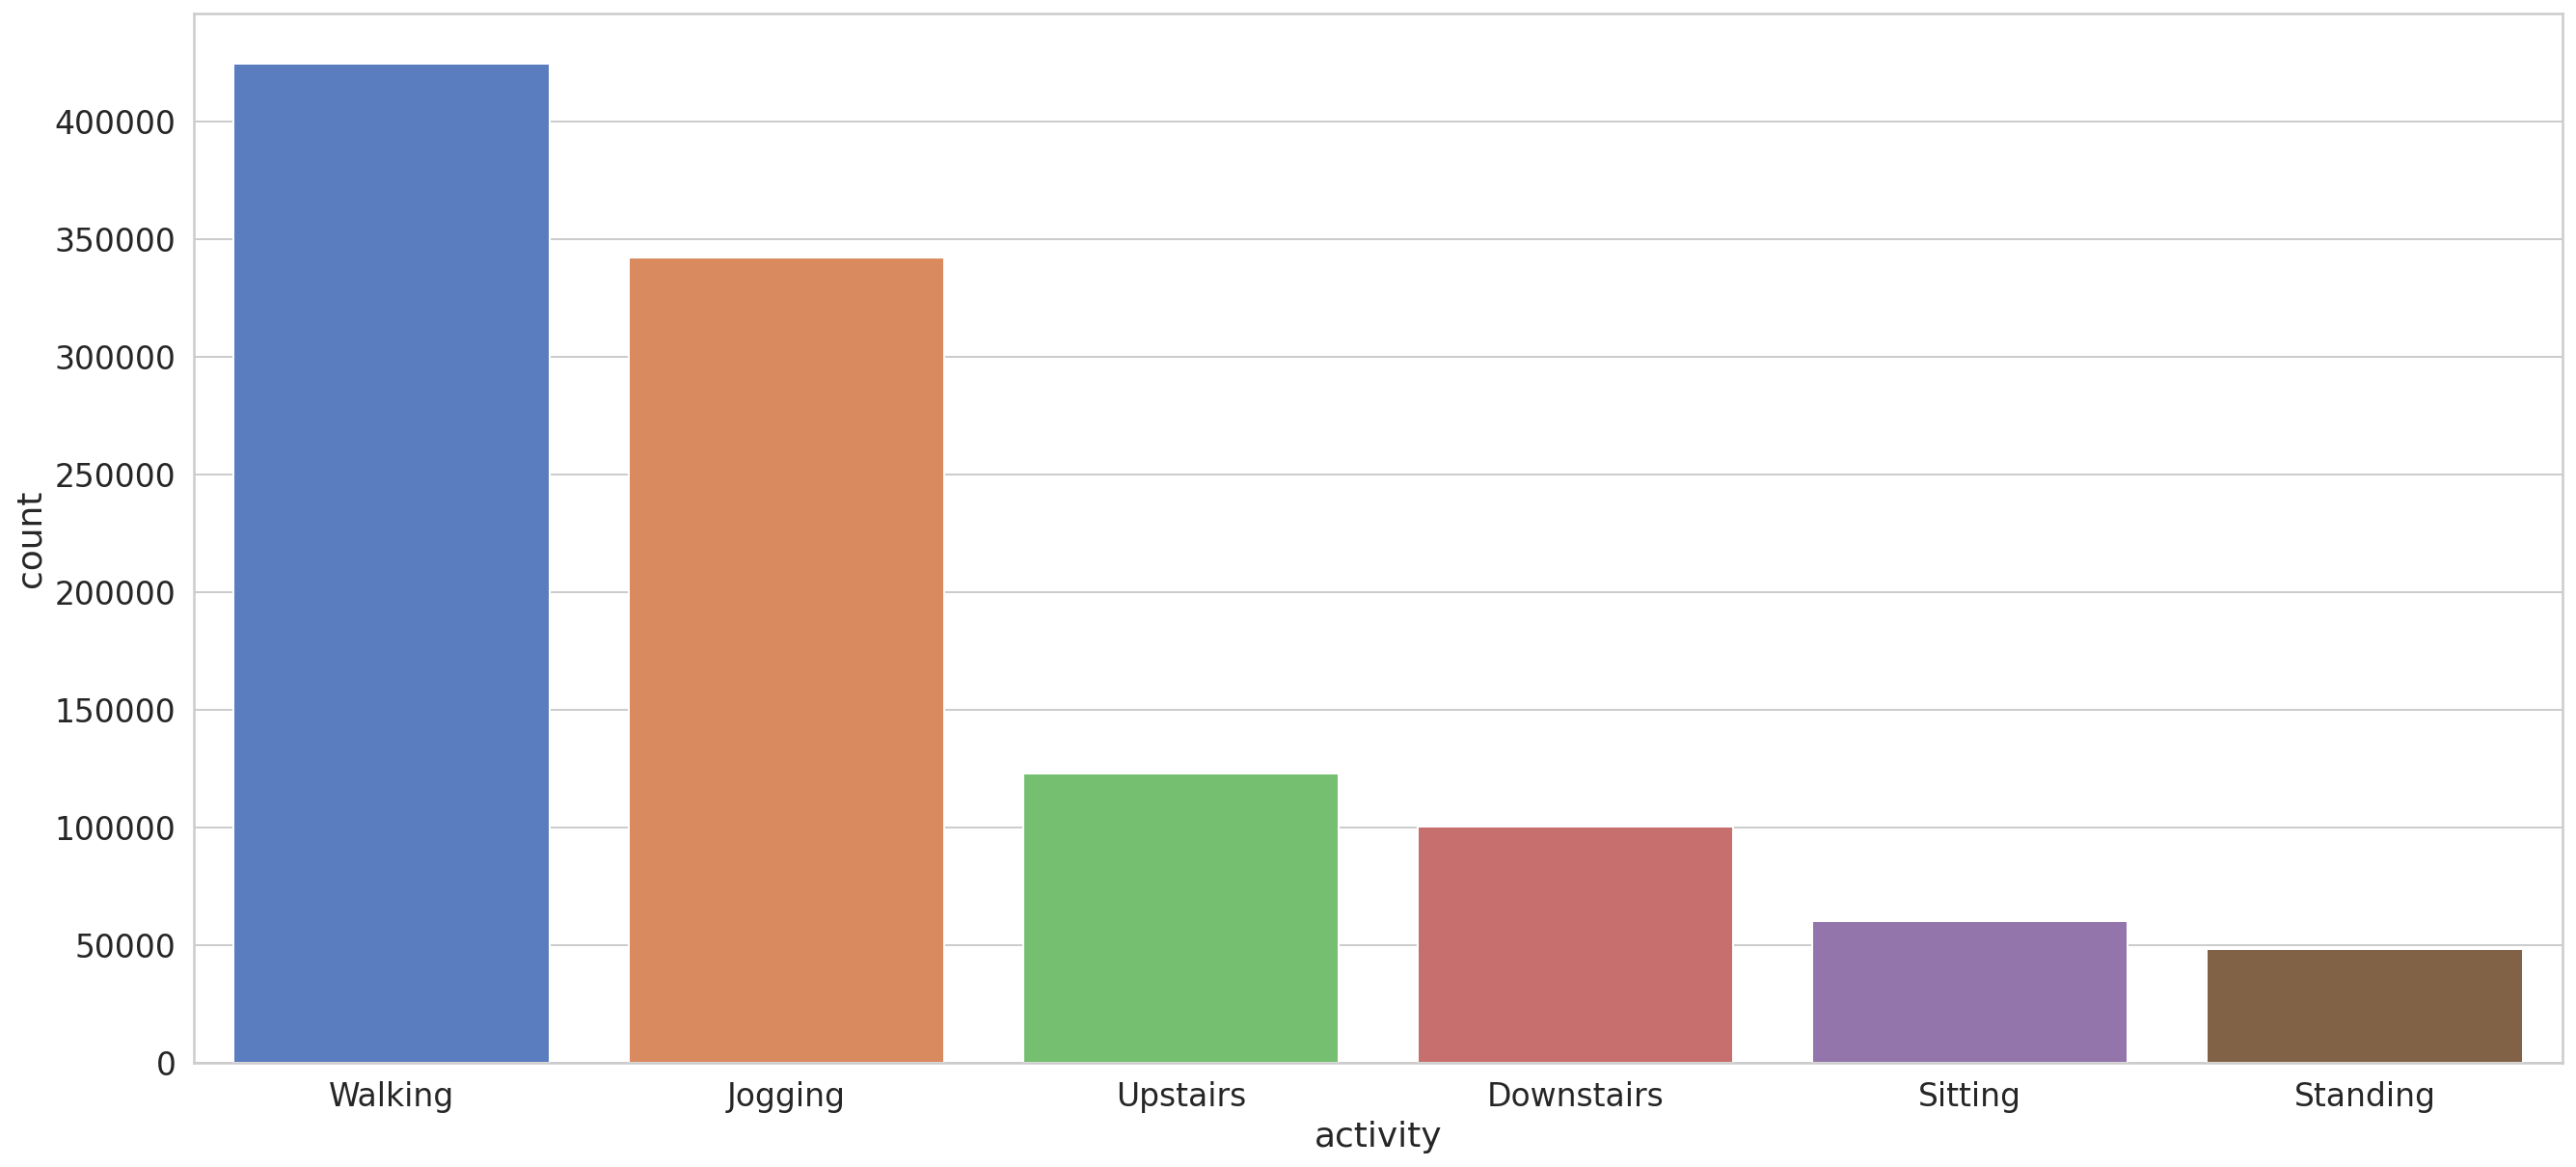

In [13]:
sns.countplot(x = 'activity',
              data = df,
              order = df.activity.value_counts().index);

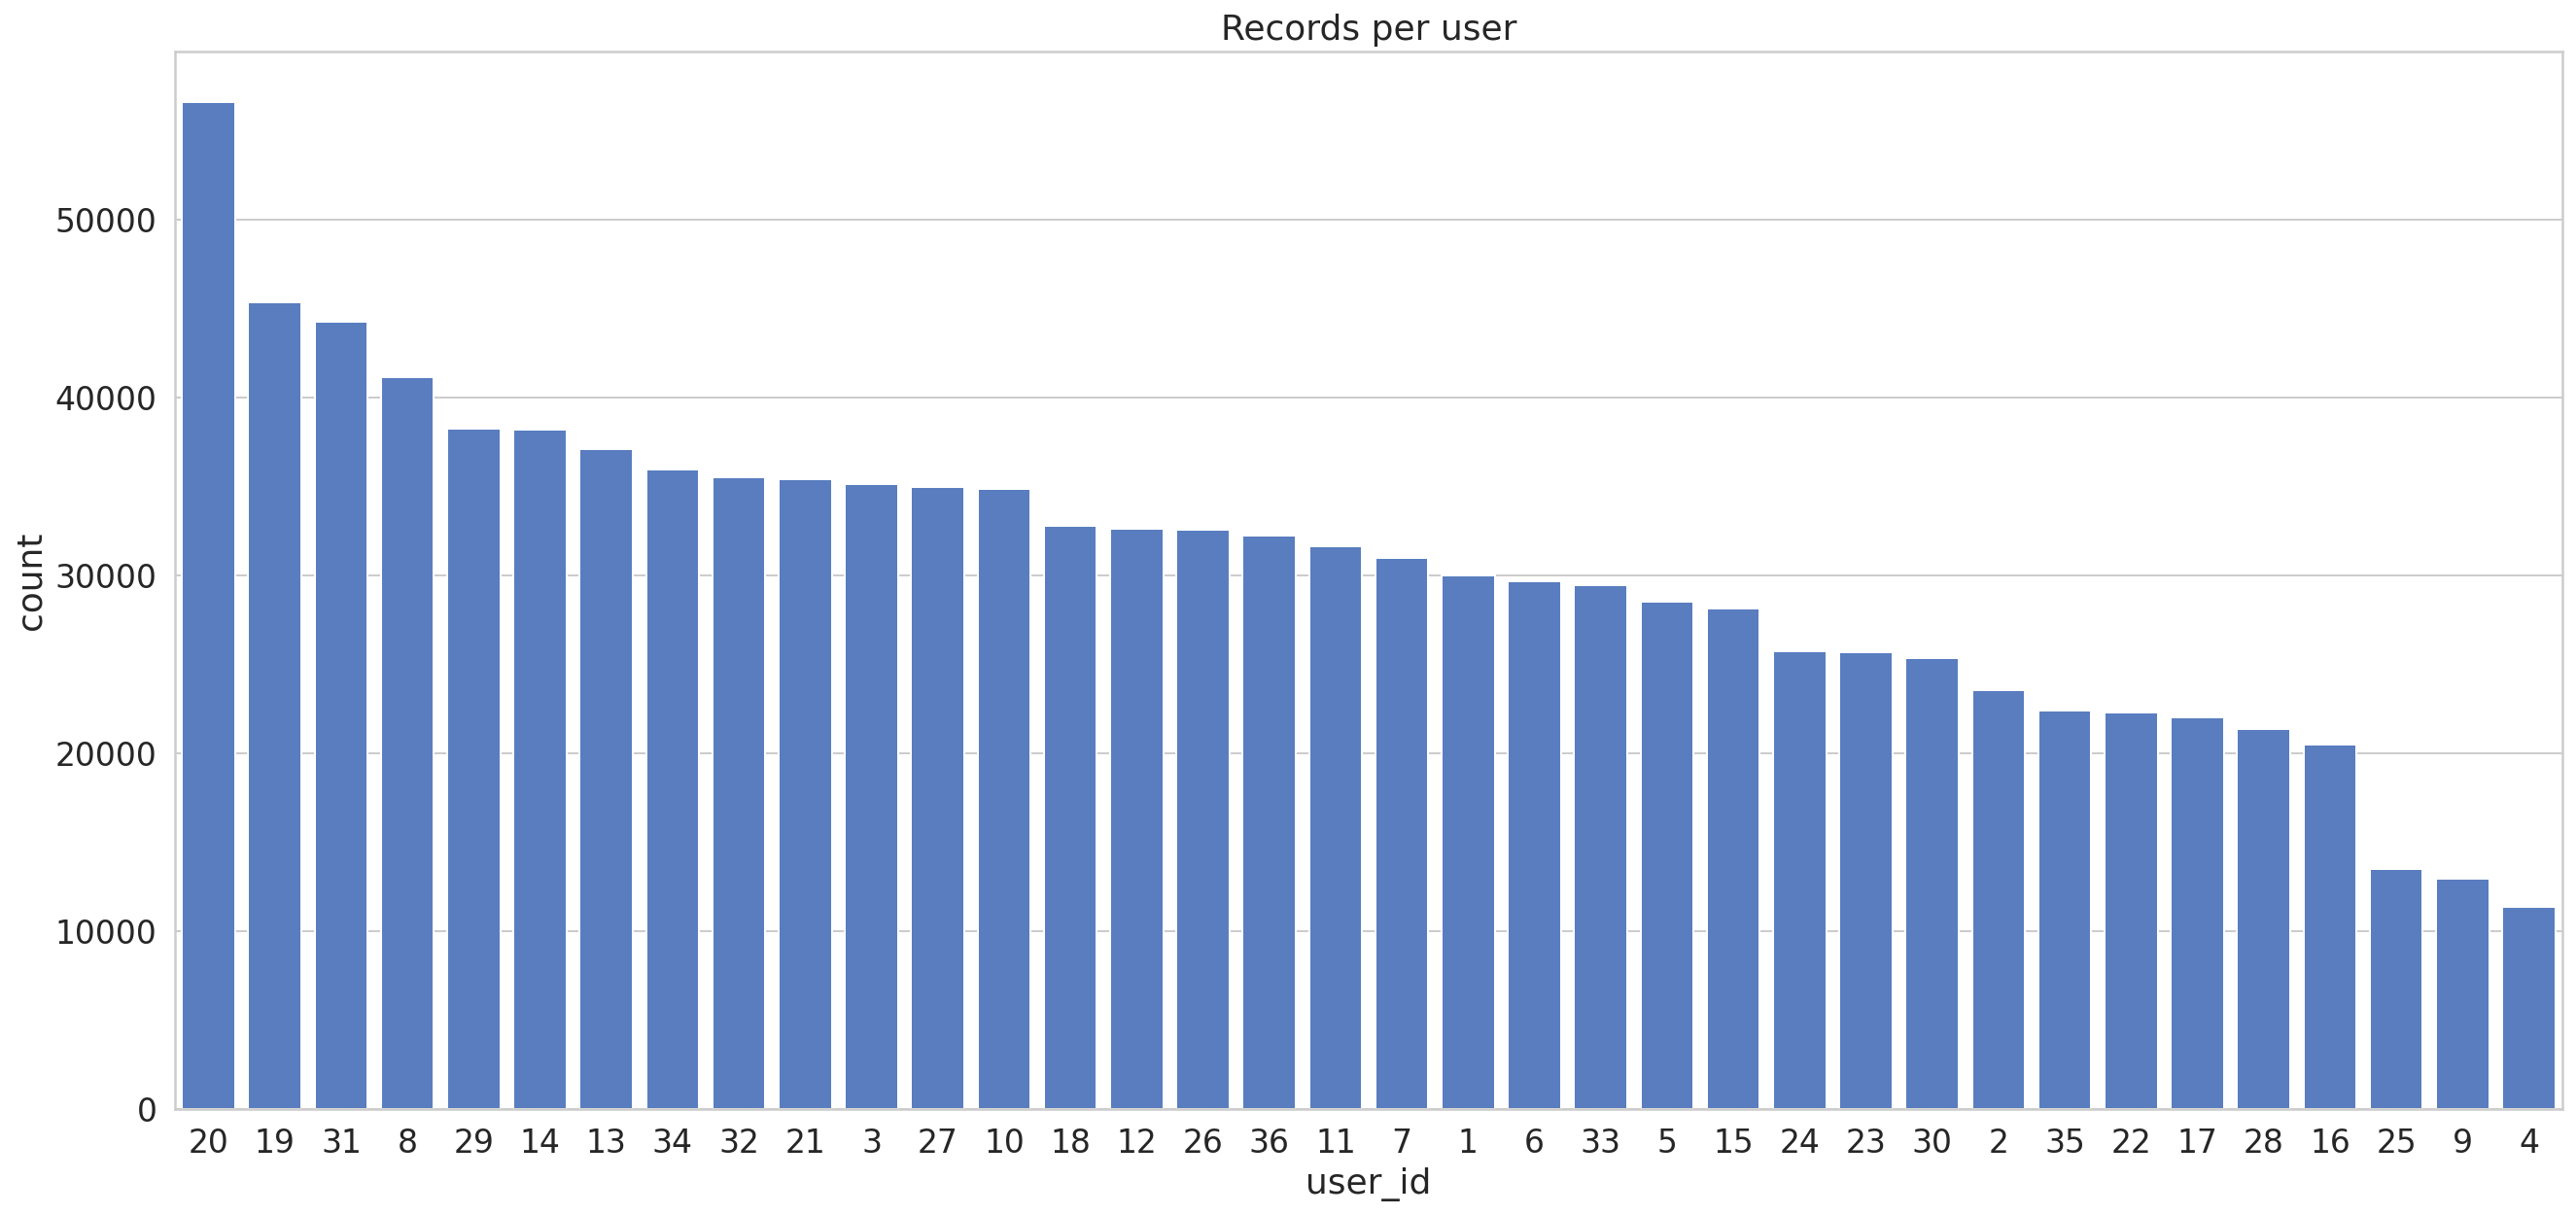

In [14]:
sns.countplot(x = 'user_id',
              data = df,
              palette=[sns.color_palette()[0]],
              order = df.user_id.value_counts().index);
plt.title("Records per user");

In [15]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x_axis', 'y_axis', 'z_axis']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

/home/captain/Desktop/myenv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/captain/Desktop/myenv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/captain/Desktop/myenv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/captain/Desktop/myen

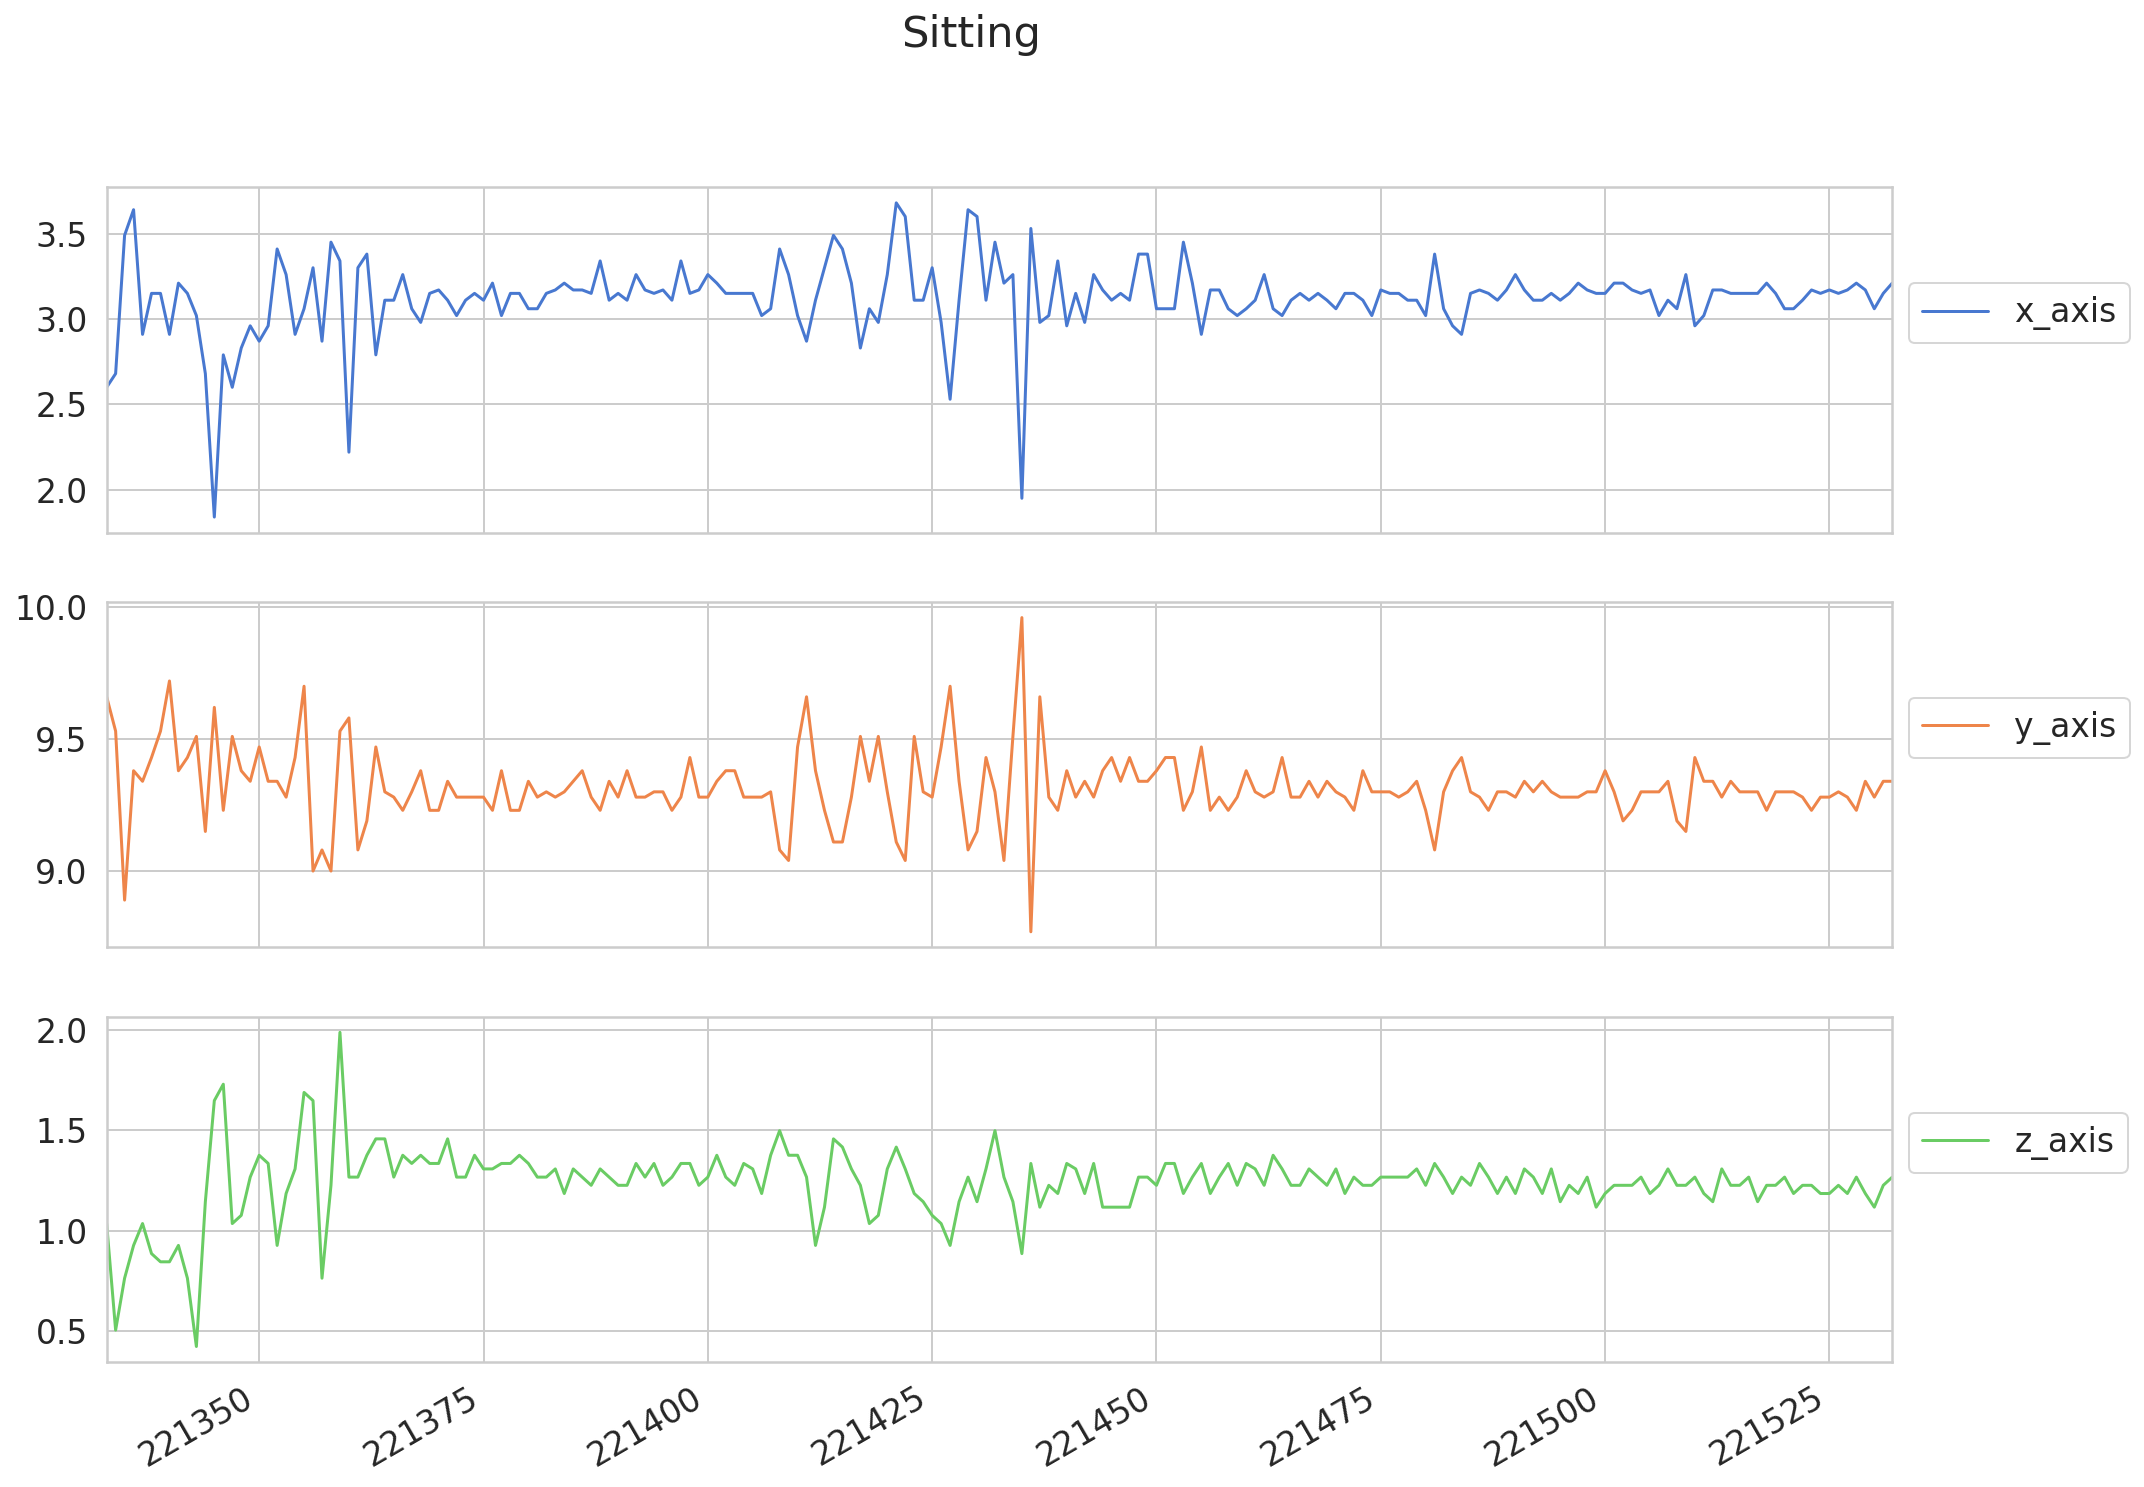

In [16]:
plot_activity("Sitting", df);

/home/captain/Desktop/myenv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/captain/Desktop/myenv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/captain/Desktop/myenv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/captain/Desktop/myen

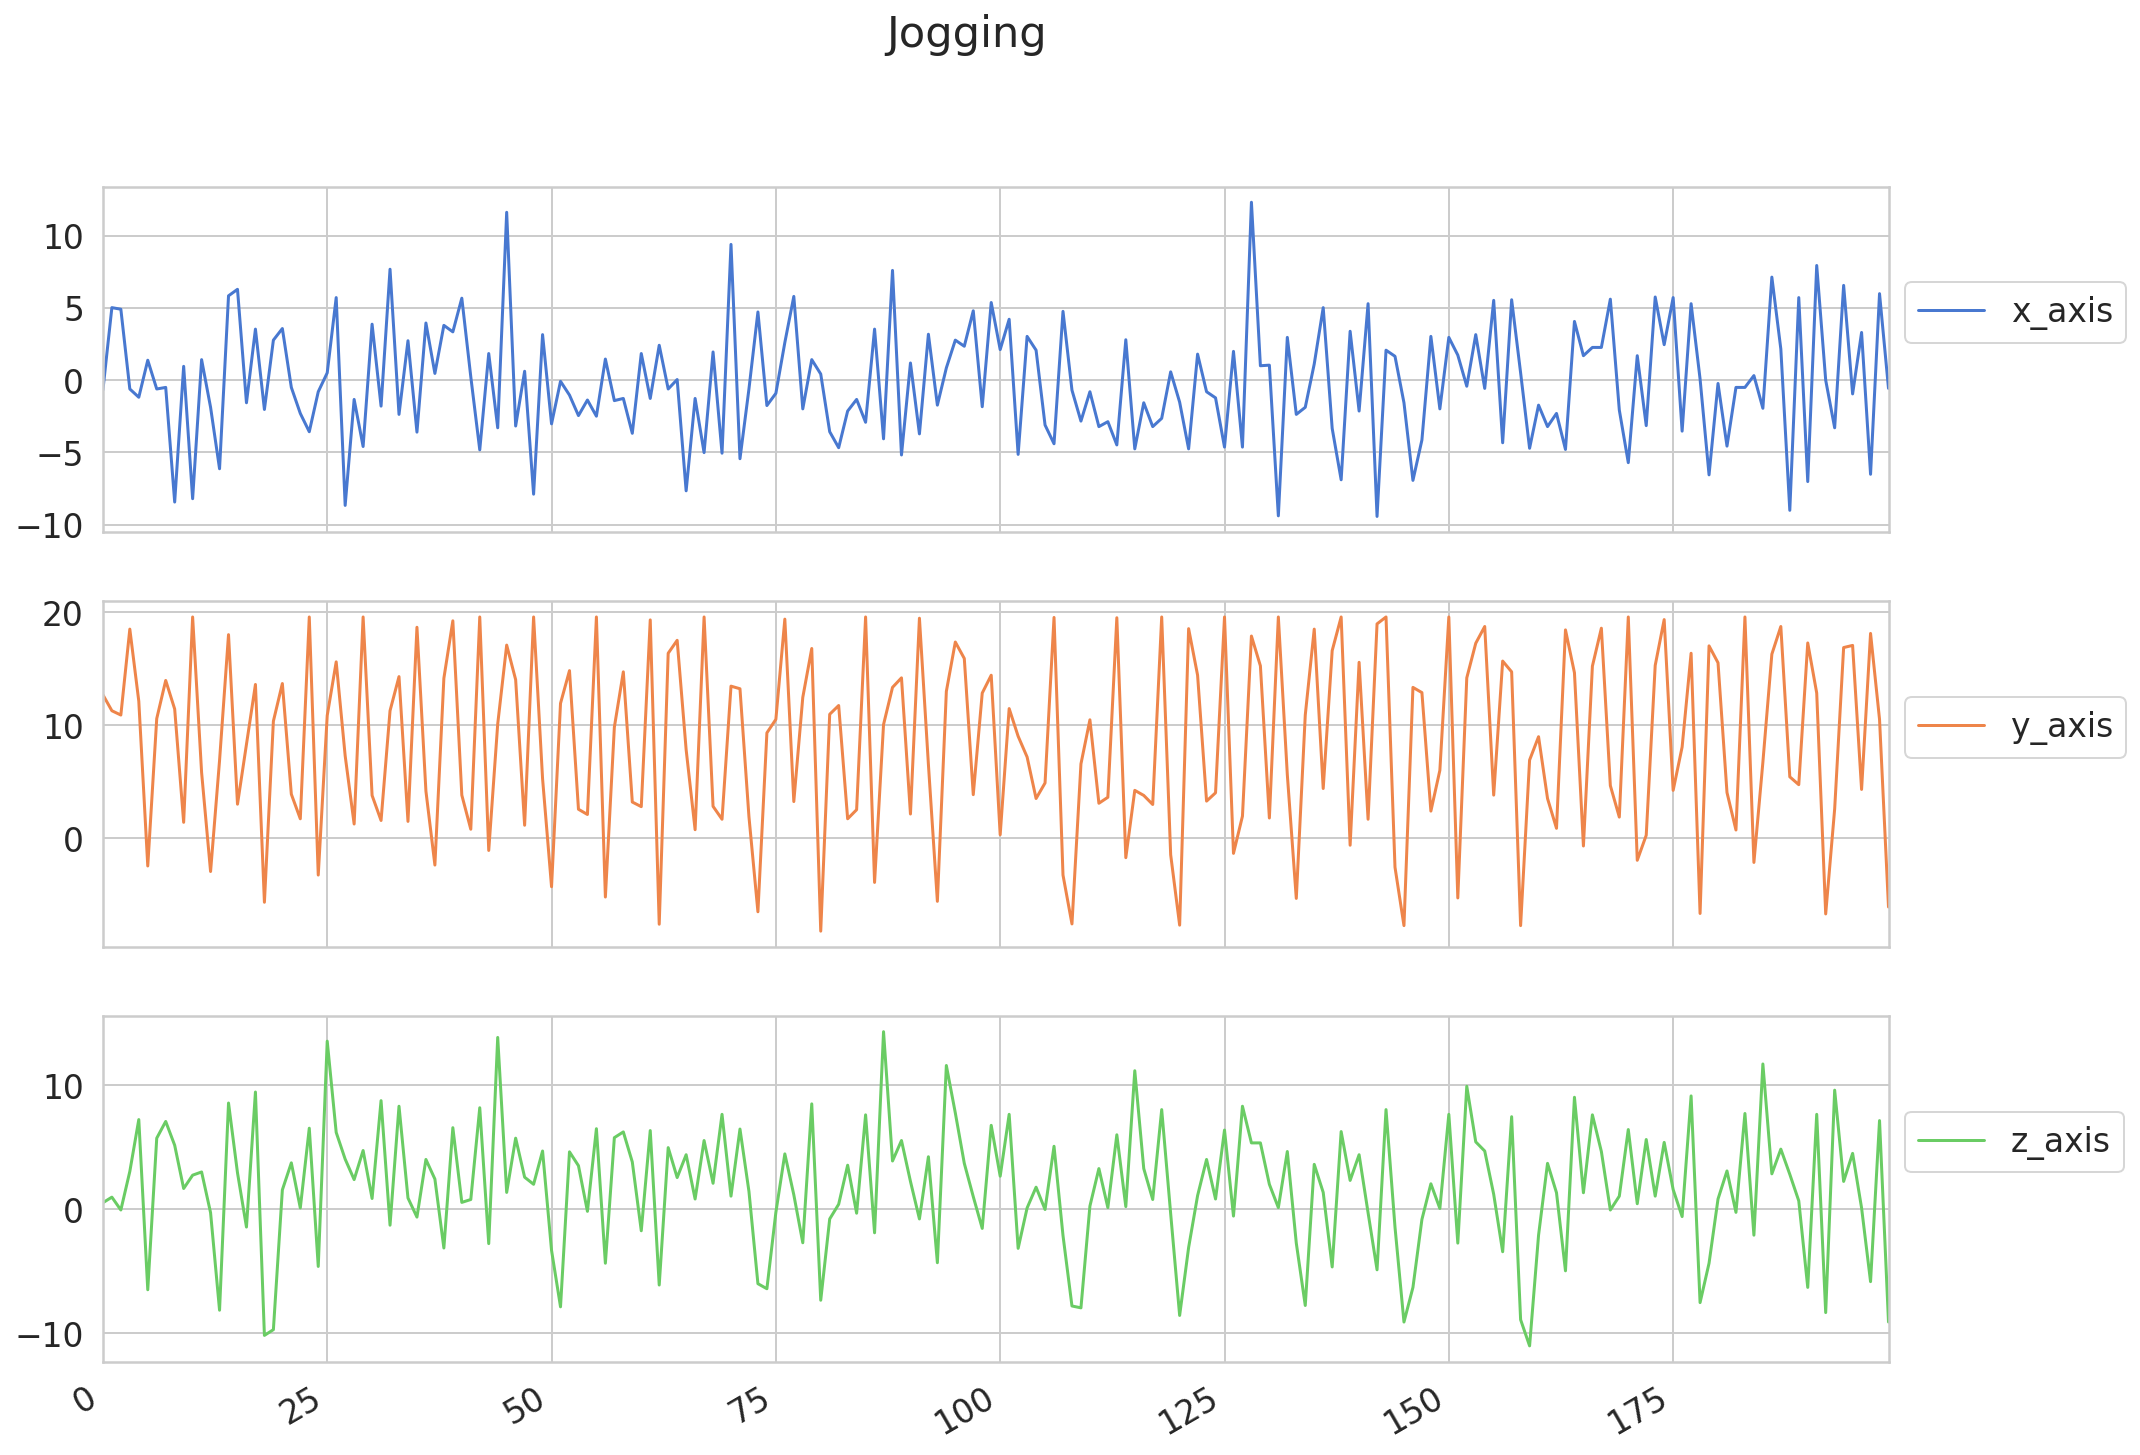

In [17]:
plot_activity("Jogging", df);

In [18]:
df_train = df[df['user_id'] <= 30]
df_test = df[df['user_id'] > 30]

In [20]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['x_axis', 'y_axis', 'z_axis']

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

/home/captain/Desktop/myenv/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/captain/Desktop/myenv/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.activity, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.activity, 
    TIME_STEPS, 
    STEP
)

In [22]:
print(X_train.shape, y_train.shape)

(22454, 200, 3) (22454, 1)


In [23]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [24]:
print(X_train.shape, y_train.shape)

(22454, 200, 3) (22454, 6)


In [25]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [27]:
history = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

Train on 20208 samples, validate on 2246 samples
Epoch 1/2
20208/20208 [==============================] - 153s 8ms/sample - loss: 0.8043 - acc: 0.7235 - val_loss: 0.6619 - val_acc: 0.7903
Epoch 2/2
20208/20208 [==============================] - 149s 7ms/sample - loss: 0.6504 - acc: 0.7704 - val_loss: 0.5515 - val_acc: 0.8433


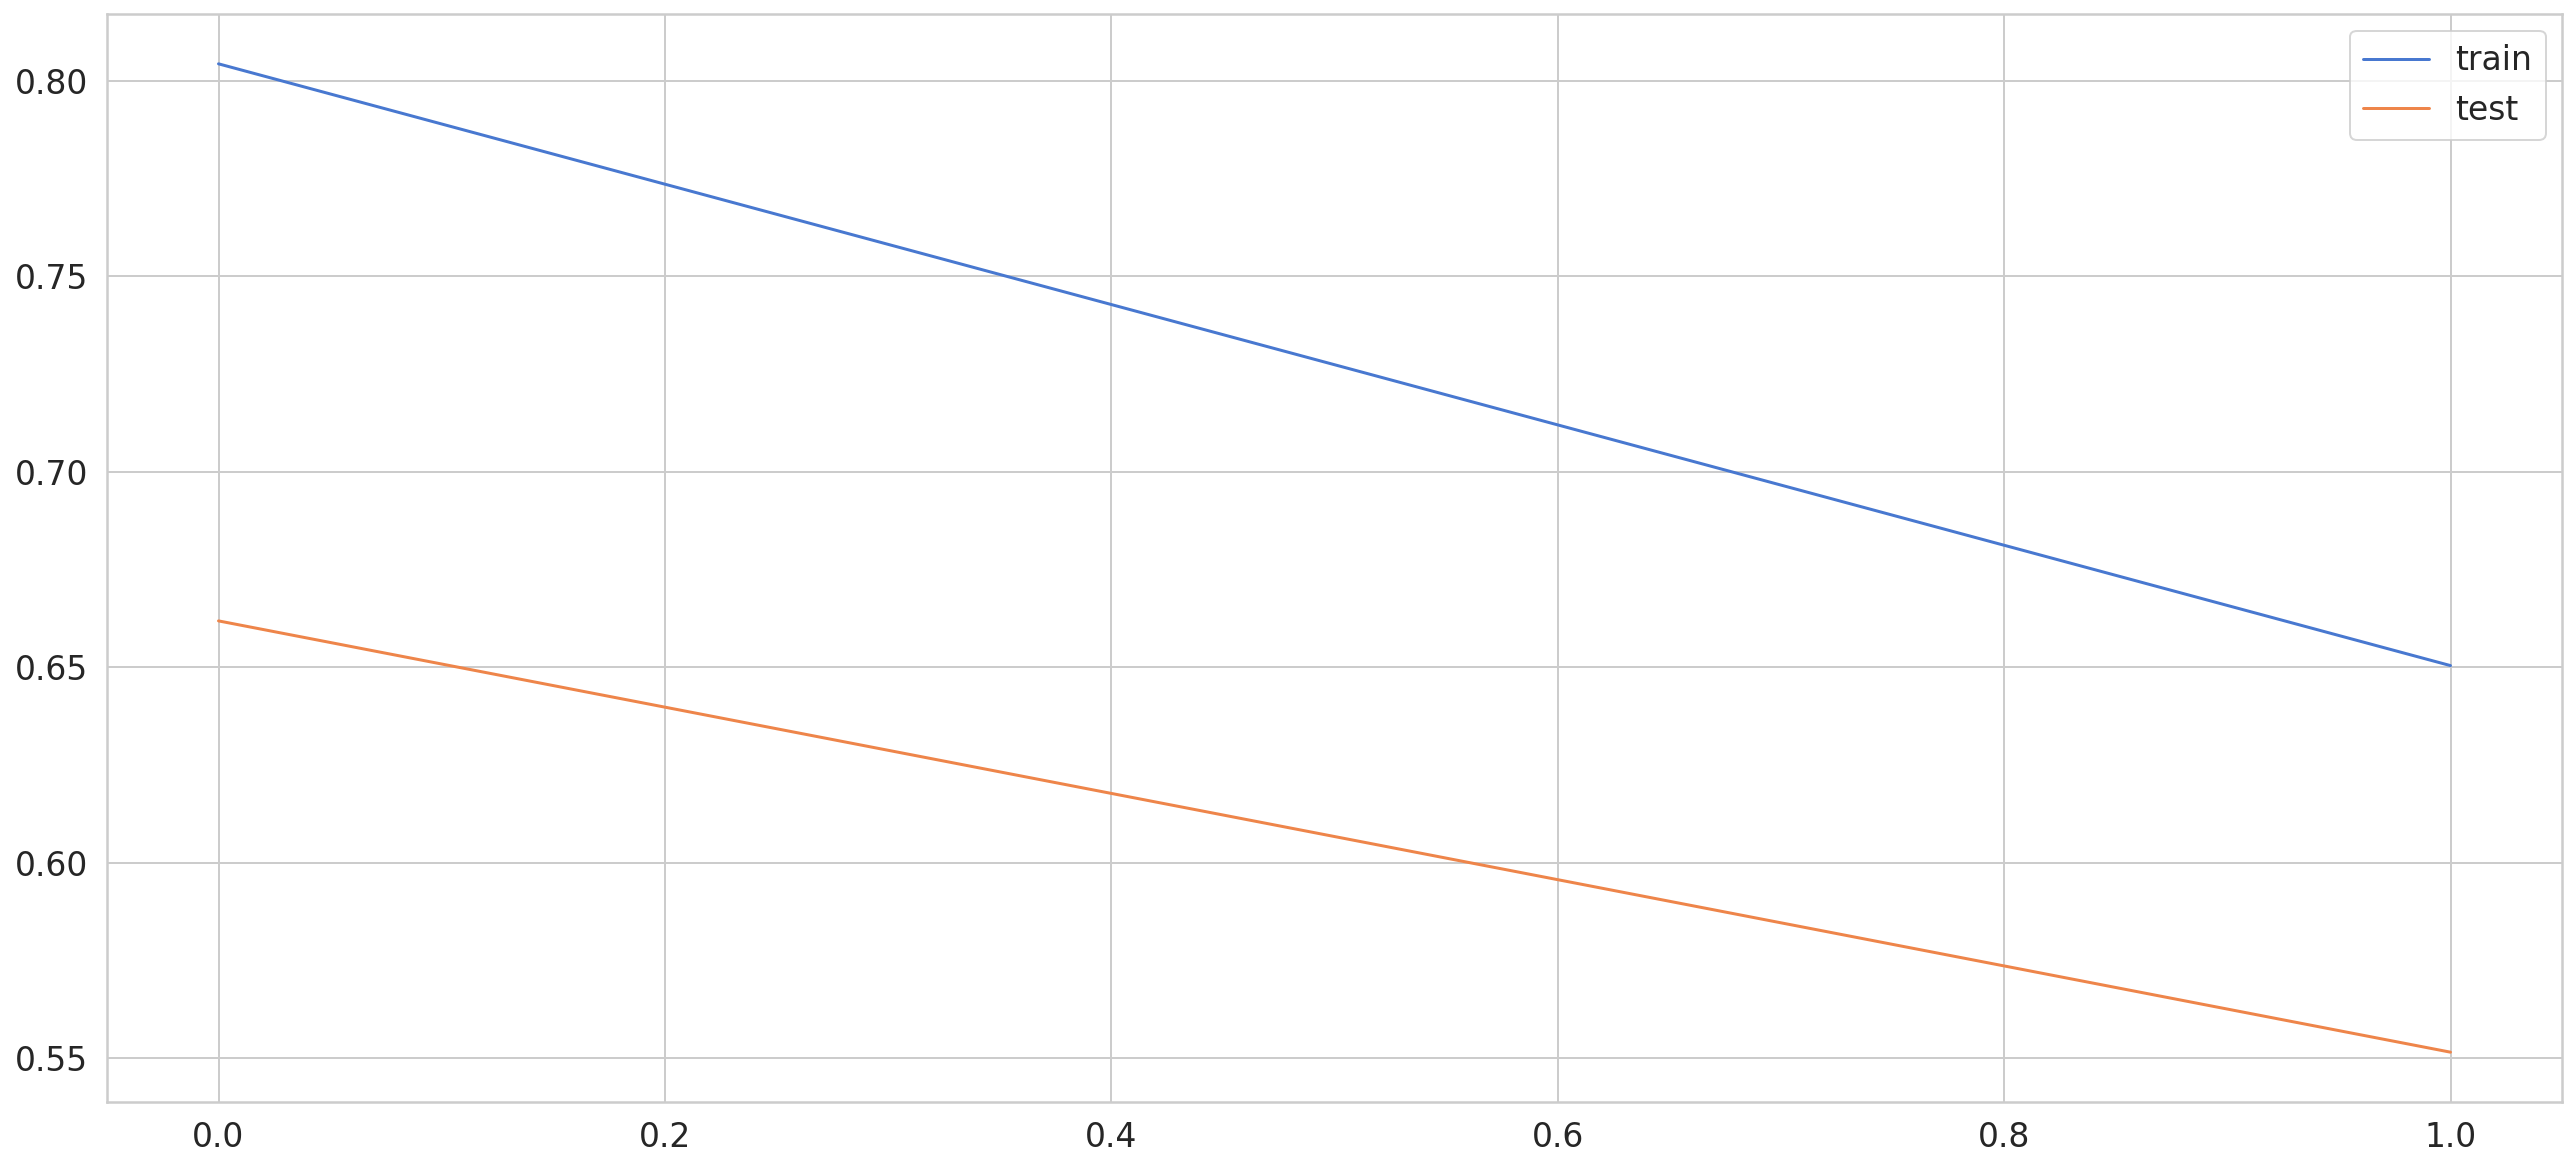

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [29]:
model.evaluate(X_test, y_test)

4992/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8069953370890849, 0.73677886]

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

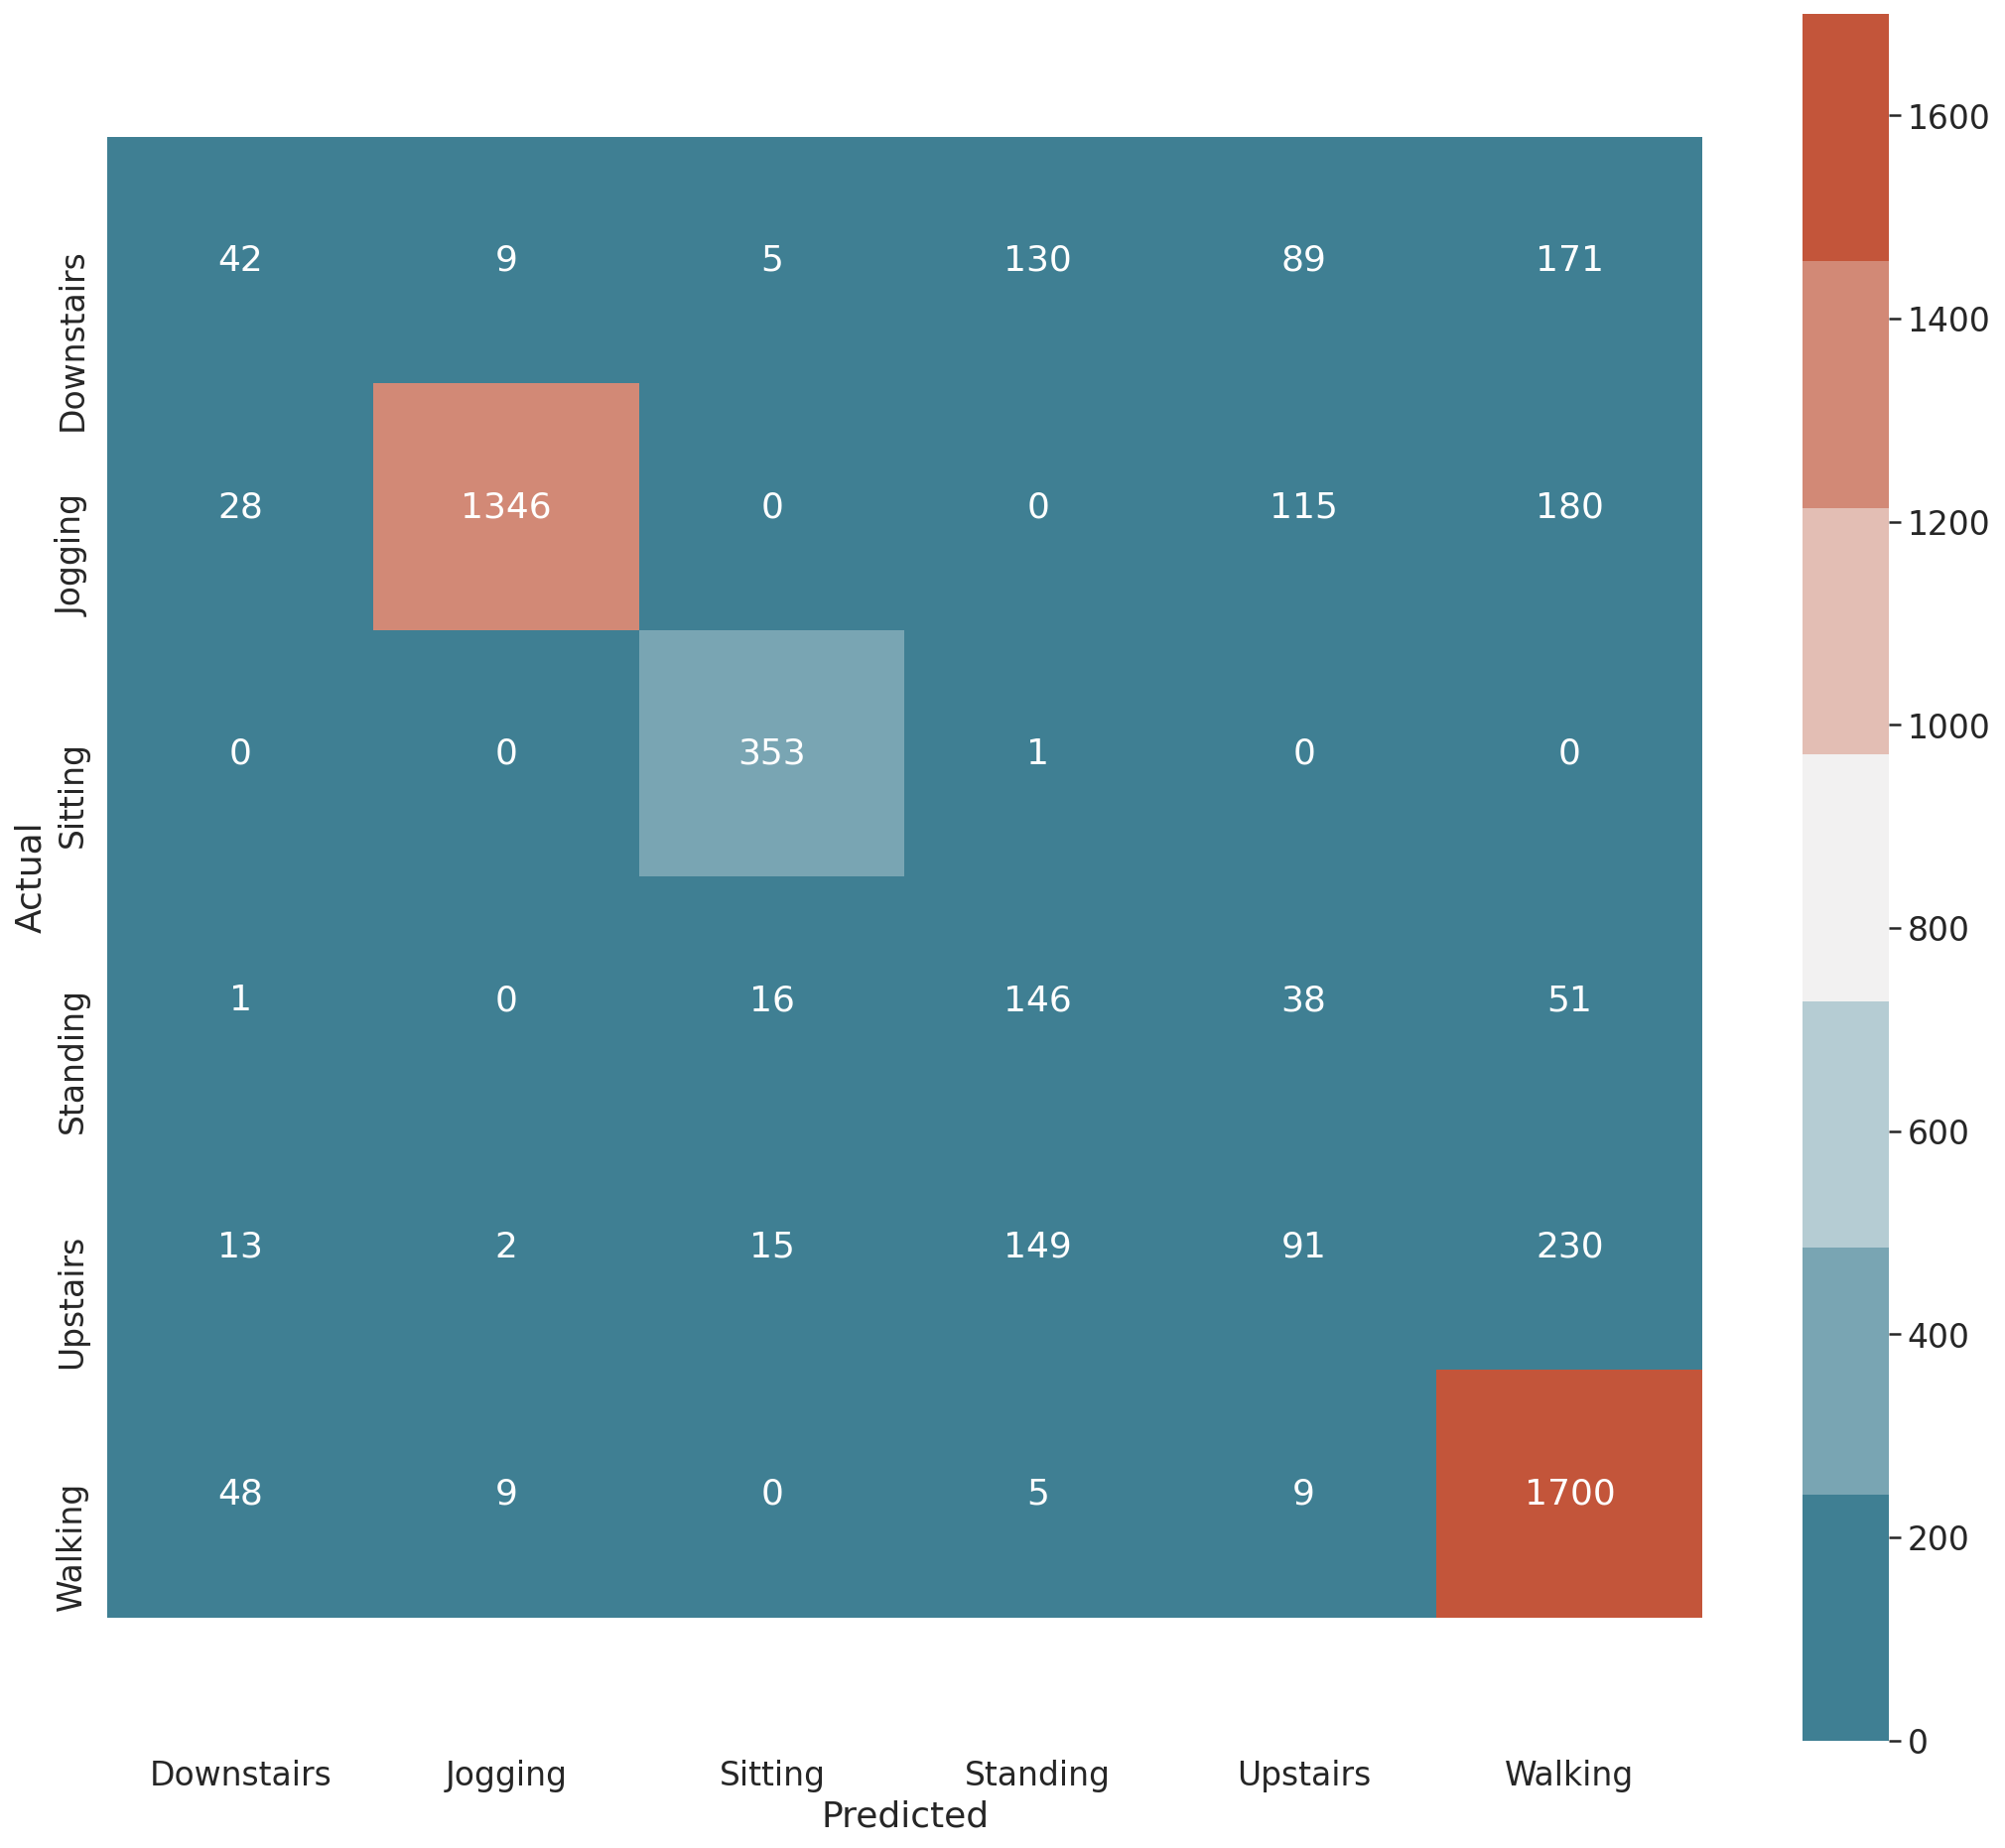

In [32]:
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)

In [33]:
model.save('model_epoch2.h5')

In [35]:
a = np.array(X_train[1])

In [36]:
print(a)

[[ 1.36138740e-01  1.00593772e-01  4.65819088e-01]
 [ 1.46863425e-01  2.22971737e-02  4.82357088e-01]
 [ 2.61260052e-01  1.05487305e-01  6.14660720e-01]
 [ 4.41792205e-01  2.29457006e-01  6.14660720e-01]
 [ 2.80921955e-01  9.57002395e-02  4.10692578e-01]
 [ 1.46863425e-01  6.01365868e-01  4.10692578e-01]
 [ 1.71887677e-01  6.96014371e-02 -1.07496714e-01]
 [ 5.57036168e-02  2.11514012e-01 -3.33515440e-01]
 [-4.43934265e-02  2.70236407e-01 -1.24034665e-01]
 [ 2.16573885e-01  2.01726826e-01 -1.84673848e-01]
 [ 2.55897703e-01  1.83783832e-01 -1.15765696e-01]
 [ 3.16670919e-01  2.11514012e-01 -2.48069348e-01]
 [ 2.91646667e-01  4.31723234e-01 -1.29547318e-01]
 [ 3.32757940e-01  4.95339162e-01 -3.25246470e-01]
 [-6.04804520e-02  7.05761317e-01 -4.96138674e-01]
 [ 1.30776404e-01  3.81156647e-01  1.79161191e-01]
 [ 2.11211522e-01 -2.10961437e-01  2.56338334e-01]
 [-6.58427940e-02 -5.09467305e-01  4.90626037e-01]
 [ 1.45923294e-02  4.17042515e-01  1.33406177e+00]
 [ 1.00389803e-01  4.77396168e-

In [39]:
print(len(y_pred))
print(len(y_pred))


4992


In [40]:
print(X_train.shape)

(22454, 200, 3)


In [41]:
a.shape

(200, 3)

In [42]:
print(X_train.ndim)

3
